# House Sales Price

<br>
<img src="house_sale.png">
<br>

#### Os preços de venda de casas de conjunto de dados para King County, Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015. O conjunto de dados fornece recursos que as casas têm e o preço pelo qual elas foram vendidas. Pode ser usado para modelar a previsão de preços de casas.

#### O conjunto de dados está disponível em kaggle [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

#### Alguns dos atributos capturados no conjunto de dados são

- Número de quartos e banheiros
- Total de pés quadrados 
- Quantos andares
- Se tem um porão e tamanho do porão
- Classificação da casa
- Clima tem beira-mar e a qualidade da vista
- Quando a casa foi construída e se a casa é renovada, se for renovado
- Latitude e longitude
- preço da casa
- Quando a casa foi vendida



#### Levante algumas hipóteses a sua escolha e comprove se é possível não-rejeitar ou rejeitar, respondendo se as médias são estatisticamente iguais/equivalentes ou estatisticamente diferentes/significativas.

#### Exercício 1: Faça a leitura do dataset, colete suas informações básicas, verifique a distribuição e plote dispersão dos dados de preços das casas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Standard size of figures on this notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [ ]:
kc = pd.read_csv('kc_house_data.csv')

In [ ]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Não temos dados nulos e todas as variáveis estão no tipo correto para se fazer operações com elas.

Distribuição preço das casas

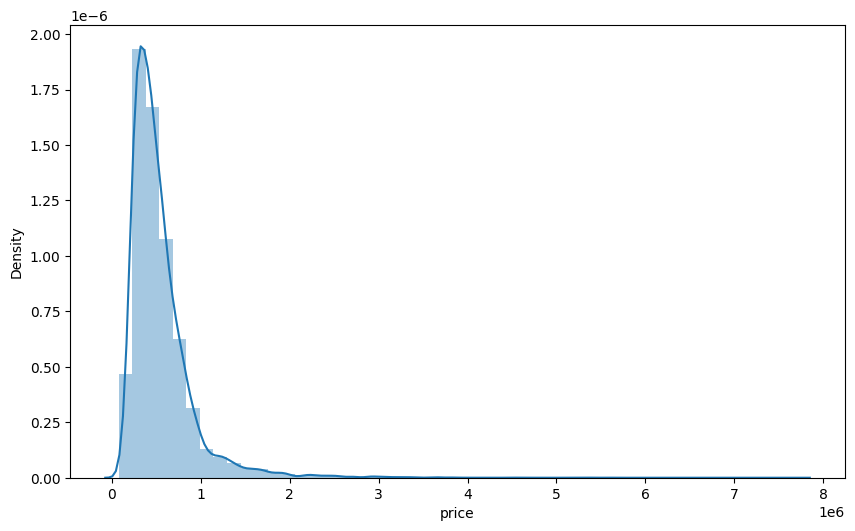

In [ ]:
sns.distplot(kc['price']);

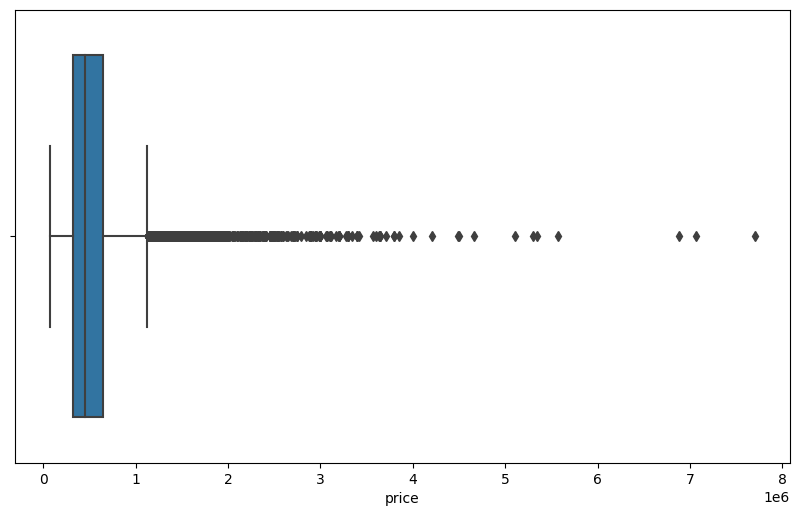

In [ ]:
sns.boxplot(kc['price']);

Temos uma distribuição enviesada à direita. Isso nos indica que as casas possuem os peços concentrados em valores mais baixos em nossa distribuição, mas possuímos casas outliers com valores considerados muito mais altos do que a maioria dos nossos dados.

#### Exercício 2: Quais as 10 casas com a melhor relação custo/benefício do preço por metro quadrado?

[How to Convert Square Feet Into Square Meters](https://sciencing.com/convert-feet-square-meters-5138447.html)

Vamos somar as colunas sqft_living,	sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 e obter o tamanho total em square feet da casa. Logo após, vamos utilizar a fórmula de conversão de pés quadrados para metros quadrados apontada no link acima.


In [ ]:
kc['square_meters'] = round((kc['sqft_living'] + kc['sqft_lot'] + kc['sqft_above'] + kc['sqft_basement'] + kc['sqft_living15'] + kc['sqft_lot15']) * 0.09290304, 2)

In [ ]:
kc['square_meters'].head()

0    1393.55
1    2017.02
2    2073.78
3    1419.56
4    1927.09
Name: square_meters, dtype: float64

In [ ]:
kc['cost_benefit'] = kc['price'] / kc['square_meters']

In [ ]:
kc.sort_values(by= 'cost_benefit', ascending= True).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,square_meters,cost_benefit
17319,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730,110055.17,1.726407
1719,1020069017,20150327T000000,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,193433.42,3.618816
15620,2225079030,20141212T000000,180000.0,2,1.00,960,87991,1.5,0,0,3,5,960,0,1946,0,98014,47.6300,-121.900,1940,392040,44954.94,4.004009
17197,5111400086,20140512T000000,110000.0,3,1.00,1250,53143,1.0,0,0,5,6,1250,0,1945,0,98038,47.4235,-122.051,1820,217800,25572.77,4.301450
3493,522069097,20141125T000000,150000.0,2,1.00,720,212137,1.0,0,0,3,5,720,0,1982,0,98058,47.4220,-122.066,2010,109642,30214.76,4.964461
7647,2623069031,20140521T000000,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,106979.06,5.071086
1774,1549500370,20140505T000000,210000.0,3,1.00,1340,306848,1.0,0,0,3,5,1340,0,1953,0,98019,47.7534,-121.912,1800,128066,40821.04,5.144406
4540,2522029039,20140929T000000,550000.0,3,2.00,3650,843309,2.0,0,0,4,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992,104652.58,5.255484
12950,120059044,20150217T000000,250000.0,3,1.75,1628,286355,1.0,0,0,3,7,1628,0,1996,0,98092,47.2558,-122.122,1490,216344,47143.18,5.302994
17576,1222069089,20140904T000000,375000.0,1,1.00,800,533610,1.5,0,0,5,5,800,0,1950,0,98038,47.4134,-121.986,1790,216057,69961.28,5.360108


In [ ]:
kc['condition'].unique()

array([3, 5, 4, 1, 2])

Percebemos que elas possuem pouco números de andares; são, em grande maioria mais antigas e não foram renovadas. Apesar disso, possuem uma condição bem balanceada já que o range para a condição das casas é de 1 a 5.

#### Exercício 3: Qual a correlação do nível de classificação das casas em relação ao seu preço?

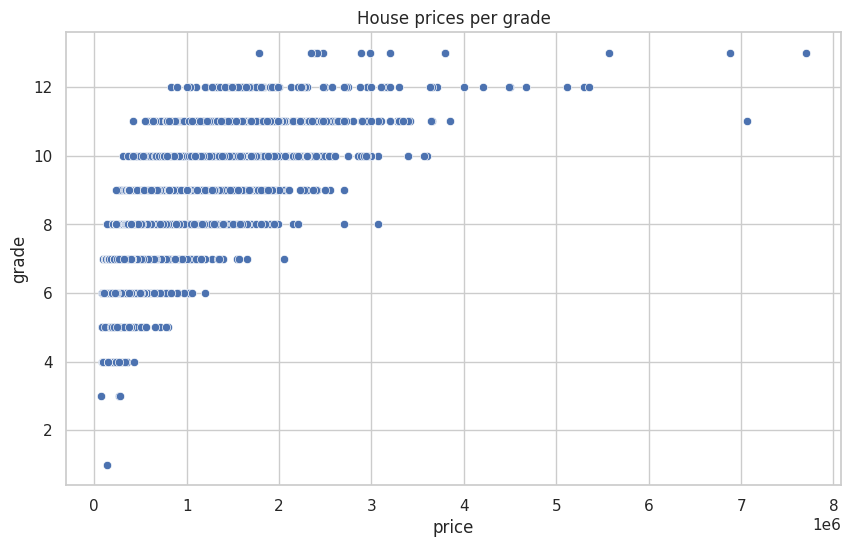

In [ ]:
sns.set_theme(style="whitegrid")

sns.scatterplot(kc['price'], kc['grade'])

plt.title('House prices per grade');

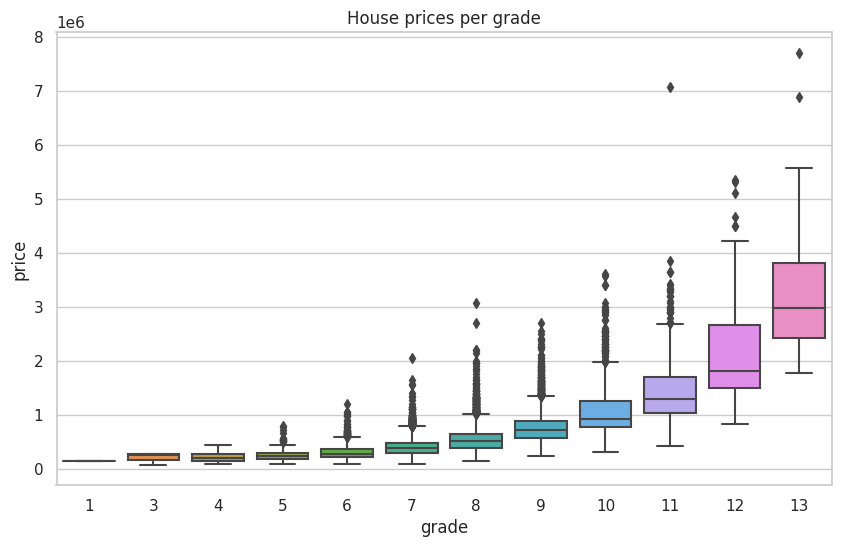

In [ ]:
sns.boxplot(kc['grade'], kc['price'])

plt.title('House prices per grade');

In [ ]:
kc[['price', 'grade']].corr()

,price,grade
price,1.000000,0.667434
grade,0.667434,1.000000


Temos uma correlação de 66%, 67%. Não temos uma correlação positiva tão forte, mas podemos perceber (no boxplot) que as casas com maiores notas estão concentradas em valores de preços maiores.

#### Exercício 4: Podemos afirmar que estar de frente para o lago representa um fator que eleva o preço médio das casas, com uma confiança superior a 95%?

0 = não é de frente para o lago

1 = sim, é de frente para o lago

In [31]:
#Primeiro passo, separar os preços das casas dos dois grupos em variáveis diferentes
nao_frente_pro_lago = kc[kc['waterfront'] == 0]['price'].values
frente_pro_lago = kc[kc['waterfront'] == 1]['price'].values


# Tamanho das duas amostras
print(len(nao_frente_pro_lago), len(frente_pro_lago))

21450 163


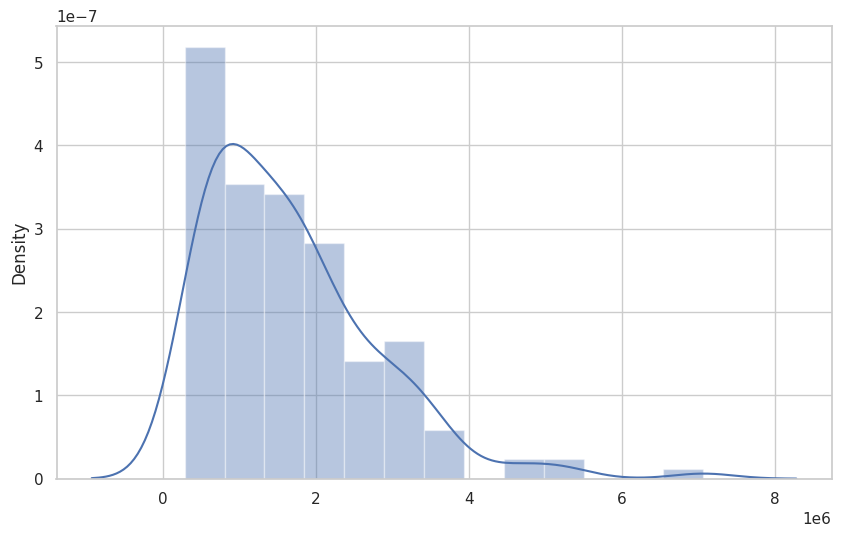

In [32]:
sns.distplot(frente_pro_lago);

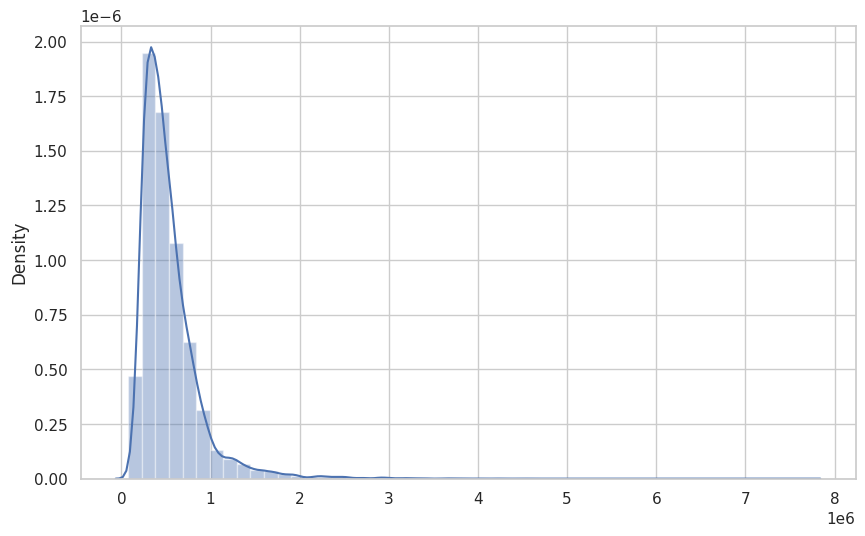

In [33]:
sns.distplot(nao_frente_pro_lago);

Como não conseguimos visualmente afirmar que as duas distribuições são normais (os gráficos indicam que são enviesadas à direita), vamos utilizar o teste não paramétrico  Mann-Whitney U Test para testar se há diferenças significativas entre as duas distribuições.

[Nonparametric statistical tests for the continuous data: the basic concept and the practical use](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4754273/)

###O [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) (para duas amostras independentes, não paramétricas e não pareadas)


O [Mann-Whitney U test](https://www.statisticshowto.com/mann-whitney-u-test/) é um teste estatístico não paramétrico de significância para determinar se duas amostras independentes e não pareadas são provenientes de populações com a mesma distribuição. 
Neste caso vamos utilizar o teste para determinar a probabilidade que selecionada qualquer observação de preço, aleatoriamente, em uma amostra (casas de frente para o lago), ela ser maior que uma observação na outra amostra (casas não de frente para o lago). Assim, podemos determinar a probabilidade das casas de frente para o lago possuírem maiores preços. Nesse sentido não vamos comparar o preço medio dos dois tipos de casas como desejado no enunciado, mas um procedimento que parece ser mais específico tendo em vista as características das variáveis com as quais estamos lidando.

*Hipótese nula* (H0): As distribuições das amostras são iguais. Não temos indícios de que existem diferenças significativas dos preços de acordo com a localização das casas.

*Hipótese alternativa* (H1): As distribuições das duas amostras são diferentes sendo mais provável termos valores mais altos de casas de frente para o lago.

h0 = As distribuições "provém" de populações similares, portanto não possuem diferenças significativas entre os preços das casas. 
 
h1 = P(X > Y), isto é, a probabilidade de um valor na amostra x (casas de frente para o lago) ser maior que um valor na amostra y (casas que não são de frente para o lago).

Se o p_value gerado for maior que alpha (α = 0.05), não temos evidências de que há diferenças nas duas distribuições.

In [34]:
from scipy.stats import mannwhitneyu
# O parâmetro 'greater' nos é que específica nossa hipótese alternativa. A probabilidade de um valor em x ser maior que um valor de y.
# Se não indicado, ela testa somente se as duas amostras provém da mesmas distribuições populacionais 
#e, portanto, não possuem diferenças significativas.

p_value = mannwhitneyu(x= frente_pro_lago, y= nao_frente_pro_lago, alternative= 'greater')[1]
p_value

1.6215210391178017e-64

In [35]:
alpha = 0.05

if p_value >= alpha:
    print('Mesma distribuição (não rejeito H0)')
else:
    print('Diferentes distribuições (rejeito H0)')

Diferentes distribuições (rejeito H0)


Rejeitamos a hipótese nula de que não há diferenças no preços da casas de acordo com a sua localização. Nesse sentido, há a maior probabilidade da casa ter um preço maior se for de frente para o lago.

Obs: O teste foi realizado com dados de casas somente de King County, Seattle, não sendo possível, portanto, inferir a partir do teste feito sobre casas com mesmas características seja nos EUA ou em qualquer outro lugar do mundo.